In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline
sns.set()

import random
random.seed(99)

#dir = "https://raw.githubusercontent.com/ethelpruss/camilla/main/"
#path = dir + "ADHDFeaturesMore.csv"
#data = pd.read_csv(path)


data = pd.read_csv("ADHDFeaturesMore3.csv")

In [ ]:

data = data.drop(columns = ['Unnamed: 0', 'Dialect_Uses', 'Grammatical_Errors', 'Unfinished_Utterances', 'Filler_Uses'])

data.head(5)

,Development,Gender,Transcript_Length,Interventions,Intervention_Lengths,Mean_Intervention_Length,Child_Lines,Child_Lengths,Mean_Child_Lengths,Child_words,Mean_Child_Words,Lexical_Variety
0,ADHD,M,45383,10,"[6, 13, 30, 37, 34, 6, 9, 13, 18, 13]",17.900000,42,"[38, 43, 70, 61, 55, 31, 43, 55, 28, 19, 67, 9...",41.690476,"[7, 9, 14, 13, 11, 6, 8, 11, 5, 3, 15, 1, 7, 8...",8.333333,347
1,ADHD,M,36780,4,"[13, 13, 13, 13]",13.000000,31,"[40, 33, 42, 36, 40, 47, 40, 27, 23, 51, 24, 4...",37.225806,"[8, 7, 9, 7, 7, 9, 7, 5, 4, 10, 5, 8, 12, 9, 7...",6.870968,230
2,ADHD,M,62653,6,"[8, 31, 8, 8, 24, 11]",15.000000,52,"[20, 52, 36, 25, 28, 25, 24, 45, 36, 31, 37, 3...",33.442308,"[1, 8, 6, 5, 6, 5, 5, 9, 7, 7, 7, 7, 3, 9, 5, ...",6.230769,363
3,ADHD,M,18847,5,"[6, 13, 19, 7, 21]",13.200000,37,"[33, 25, 35, 29, 30, 44, 41, 9, 31, 54, 24, 22...",31.459459,"[5, 5, 7, 5, 5, 8, 8, 1, 5, 10, 5, 4, 5, 5, 8,...",5.837838,250
4,ADHD,F,44807,6,"[10, 28, 16, 16, 15, 6]",15.166667,50,"[36, 39, 34, 29, 30, 14, 25, 30, 55, 30, 70, 3...",35.700000,"[7, 9, 7, 5, 7, 2, 5, 5, 9, 5, 16, 5, 6, 5, 7,...",6.880000,372


In [ ]:
from sklearn.preprocessing import LabelBinarizer
data['Development'] = LabelBinarizer().fit_transform(data.Development)
data['Gender'] = LabelBinarizer().fit_transform(data.Gender)

data = data.drop('Intervention_Lengths', axis = 1)
data = data.drop('Child_Lengths', axis = 1)
data = data.drop('Child_words', axis = 1)
data = data.drop('Mean_Child_Lengths', axis = 1)
data = data.drop('Mean_Intervention_Length', axis = 1)
data = data.drop('Interventions', axis = 1)
data = data.drop('Gender', axis = 1)
#data = data.drop('Mean_Child_Words', axis = 1)
#data = data.drop('Dialect_Uses', axis = 1)
#data = data.drop('Unfinished_Utterances', axis = 1)
#data = data.drop('Filler_Uses', axis = 1)


data = data.dropna()
data = data.loc[:, data.columns!='Unnamed: 0']
data

,Development,Transcript_Length,Child_Lines,Mean_Child_Words,Lexical_Variety
0,0,45383,42,8.333333,347
1,0,36780,31,6.870968,230
2,0,62653,52,6.230769,363
3,0,18847,37,5.837838,250
4,0,44807,50,6.880000,372
...,...,...,...,...,...
70,1,33420,36,6.583333,262
71,1,32798,31,6.354839,222
72,1,20238,33,6.121212,230
73,1,19676,61,6.622951,448


In [ ]:
#Scaling the data

from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler().fit(data.loc[:, data.columns!='Development'])

data.loc[:, data.columns!='Development'] = scaler.transform(data.loc[:, data.columns!='Development'])

#scaler = MinMaxScaler().fit(data)

#data[:] = scaler.transform(data)
data

,Development,Transcript_Length,Child_Lines,Mean_Child_Words,Lexical_Variety
0,0,0.292811,0.129032,1.000000,0.179409
1,0,0.197881,0.040323,0.619753,0.060143
2,0,0.483377,0.209677,0.453288,0.195719
3,0,0.000000,0.088710,0.351117,0.080530
4,0,0.286455,0.193548,0.622102,0.204893
...,...,...,...,...,...
70,1,0.160806,0.080645,0.544962,0.092762
71,1,0.153942,0.040323,0.485549,0.051988
72,1,0.015349,0.056452,0.424801,0.060143
73,1,0.009148,0.282258,0.555263,0.282365


In [ ]:

features = data.loc[:, data.columns!='Development']
targets = data["Development"]


In [ ]:
#Train test split (ratio = 25/75))
from sklearn.model_selection import train_test_split


features_train, features_test, target_train, target_test = train_test_split(features, #feature columns
                                                                            targets, #target labels
                                                                            test_size=0.25, #train/test ratio
                                                                            random_state=99 #random seed
                                                                            )

#Ensemble Learning 


In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from scipy import stats
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier

model1 = DecisionTreeClassifier(max_depth = 6)
model2 = SVC(kernel = 'rbf', probability = True)
model3 = MLPClassifier(solver='sgd', alpha=1e-5,hidden_layer_sizes=(5,5), max_iter = 1000)
model4 = GradientBoostingClassifier(n_estimators=1000, subsample=1, learning_rate=1e-5)
model5 =  LogisticRegression(C=1)
model6 = RandomForestClassifier(n_estimators=500, max_depth = 6)
model7= KNeighborsClassifier(n_neighbors=5)

model1.fit(features_train,target_train)
model2.fit(features_train,target_train)
model3.fit(features_train, target_train)
model4.fit(features_train, target_train)
model5.fit(features_train, target_train)
model6.fit(features_train, target_train)
model7.fit(features_train, target_train)


pred1=model1.predict(features_test)
pred2=model2.predict(features_test)
pred3=model3.predict(features_test)
pred4=model4.predict(features_test)
pred5=model5.predict(features_test)
pred6=model6.predict(features_test)
pred7=model7.predict(features_test)


final_pred = np.array([])
for i in range(0,len(features_test)):
    m = stats.mode([ pred1[i],pred2[i],pred3[i],pred4[i],pred5[i],pred6[i],pred7[i]])
    final_pred = np.append(final_pred, m[0])

print("Accuracy: ", np.mean(final_pred - target_test == 0))


Accuracy:  0.6842105263157895


In [ ]:

print('Decision Tree')
print("Accuracy on training set: {:.3f}".format(model1.score(features_train, target_train)))
print("Accuracy on test set: {:.3f}".format(model1.score(features_test, target_test)))
DTScores = cross_val_score(model1, features_train, target_train, cv= LeaveOneOut())
print(DTScores)
print(f"Decision Treet mean 5-fold Cross-Validation score: {np.mean(DTScores):.3f}")
print('\n')


print('SVC')
print("Accuracy on training set: {:.3f}".format(model2.score(features_train, target_train)))
print("Accuracy on test set: {:.3f}".format(model2.score(features_test, target_test)))
SVCScores = cross_val_score(model2, features_train, target_train, cv= LeaveOneOut())
print(SVCScores)
print(f"SVC mean 5-fold Cross-Validation score: {np.mean(SVCScores):.3f}")
print('\n')


print('MLP')
print("Accuracy on training set: {:.3f}".format(model3.score(features_train, target_train)))
print("Accuracy on test set: {:.3f}".format(model3.score(features_test, target_test)))
MLPScores = cross_val_score(model3, features_train, target_train, cv= LeaveOneOut())
print(MLPScores)
print(f"MLP mean 5-fold Cross-Validation score: {np.mean(MLPScores):.3f}")
print('\n')


print('GBC')
print("Accuracy on training set: {:.3f}".format(model4.score(features_train, target_train)))
print("Accuracy on test set: {:.3f}".format(model4.score(features_test, target_test)))
GBCScores = cross_val_score(model4, features_train, target_train, cv= LeaveOneOut())
print(GBCScores)
print(f"GBC mean 5-fold Cross-Validation score: {np.mean(GBCScores):.3f}")
print('\n')


print('Logistic Regression')
print("Accuracy on training set: {:.3f}".format(model5.score(features_train, target_train)))
print("Accuracy on test set: {:.3f}".format(model5.score(features_test, target_test)))
print('\n')
LRScores = cross_val_score(model5, features_train, target_train, cv =LeaveOneOut())
print(LRScores)
print(f"Logistic Regression mean 5-fold Cross-Validation score: {np.mean(LRScores):.3f}")
print('\n')

print('Random Forest')
print("Accuracy on training set: {:.3f}".format(model6.score(features_train, target_train)))
print("Accuracy on test set: {:.3f}".format(model6.score(features_test, target_test)))
RFScores = cross_val_score(model6, features_train, target_train, cv=LeaveOneOut())
print(RFScores)
print(f"Random Forest mean 5-fold Cross-Validation score: {np.mean(RFScores):.3f}")
print('\n')


print('KNN')
print("Accuracy on training set: {:.3f}".format(model7.score(features_train, target_train)))
print("Accuracy on test set: {:.3f}".format(model7.score(features_test, target_test)))
KNNScores = cross_val_score(model7, features_train, target_train, cv= LeaveOneOut())
print(KNNScores)
print(f"KNN mean 5-fold Cross-Validation score: {np.mean(KNNScores):.3f}")
print('\n')


Decision Tree
Accuracy on training set: 0.946
Accuracy on test set: 0.632
[0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1.
 0. 0. 1. 1. 1. 0. 0. 1.]
Decision Treet mean 5-fold Cross-Validation score: 0.518


SVC
Accuracy on training set: 0.696
Accuracy on test set: 0.632
[1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0.]
SVC mean 5-fold Cross-Validation score: 0.554


MLP
Accuracy on training set: 0.482
Accuracy on test set: 0.526
[1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1.
 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1.
 1. 0. 0. 1. 0. 1. 0. 0.]
MLP mean 5-fold Cross-Validation score: 0.464


GBC
Accuracy on training set: 0.518
Accuracy on test set: 0.474
[1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1.

In [ ]:
from sklearn.ensemble import VotingClassifier
model = VotingClassifier(estimators=[ ('svc', model2), 
                                     
                                     ('lr', model5),
                                     
                                     ], voting='soft') 
model.fit(features_train,target_train)
print("Voting Test score: ", model.score(features_test,target_test))

VotingScores = cross_val_score(model, features_train, target_train, cv=LeaveOneOut())
print(VotingScores)
print(f"Mean 5-fold Cross-Validation score: {np.mean(VotingScores):.3f}")

Voting Test score:  0.6842105263157895
[1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0.
 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1.
 1. 1. 1. 1. 1. 0. 0. 0.]
Mean 5-fold Cross-Validation score: 0.589


In [ ]:
from sklearn.metrics import confusion_matrix

pred_model = model.predict(features_test)

confusion_matrix(target_test, pred_model)

array([[6, 4],
       [2, 7]])

In [ ]:


from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print("Accuracy: {:.3f}".format(accuracy_score(target_test, pred_model)))
print("Precision: {:.3f}".format(precision_score(target_test, pred_model)))
print("Recall: {:.3f}".format(recall_score(target_test, pred_model)))
print("F-Score: {:.3f}".format(f1_score(target_test, pred_model)))

Accuracy: 0.684
Precision: 0.636
Recall: 0.778
F-Score: 0.700


# Further investigating best models

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


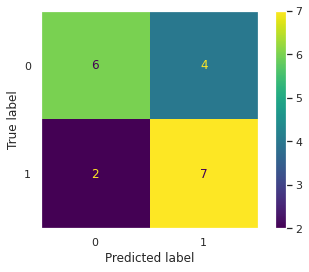

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, features_test, target_test) 

plt.grid(False)
plt.savefig('Confusionmatrix.png', dpi = 300)
plt.show()


**Note**: We should probably do a test where we remove the investigator interventions from the transcripts as well


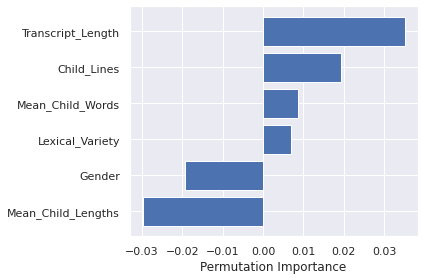

In [ ]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


perm_importance = permutation_importance(model, features_test, target_test, n_repeats = 30)

feature_names = list(features_train.columns)
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

plt.tight_layout()
plt.savefig('PermutationImportanceEnsemble.png', dpi = 300)

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 27.8 MB/s eta 0:00:00


In [ ]:

import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix

import shap
shap.initjs()
explainer = shap.Explainer(model.predict, features_train)
shap_values = explainer(features_train)

#from sklearn_rvm import EMRVR
#model_rvr=EMRVR(kernel="linear").fit(features_train, target_train)
#explainer = shap.KernelExplainer(model_rvr.predict, features_train)

Exact explainer: 42it [00:16,  1.60it/s]


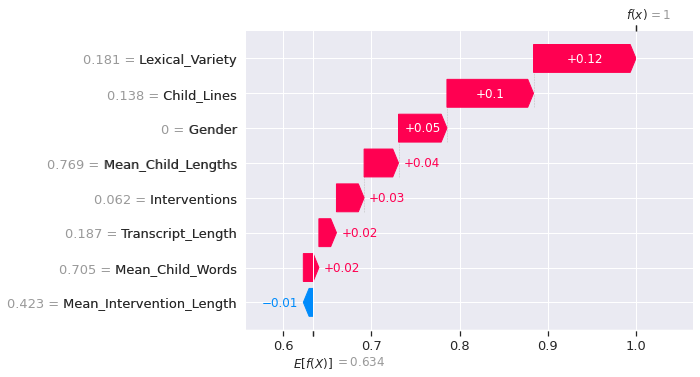

In [ ]:
import matplotlib.pyplot as plt
shap.plots.waterfall(shap_values[0], show = False)
plt.savefig('ShapWaterfall.png', dpi = 300, bbox_inches='tight')
plt.show()

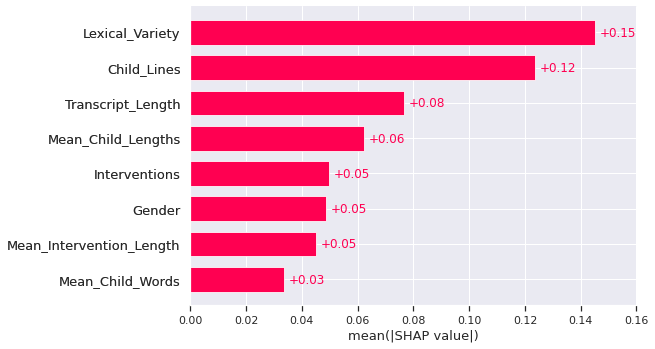

In [ ]:
shap.plots.bar(shap_values, show = False)
plt.savefig('ShapBarplot.png', dpi = 300, bbox_inches='tight')
plt.show()

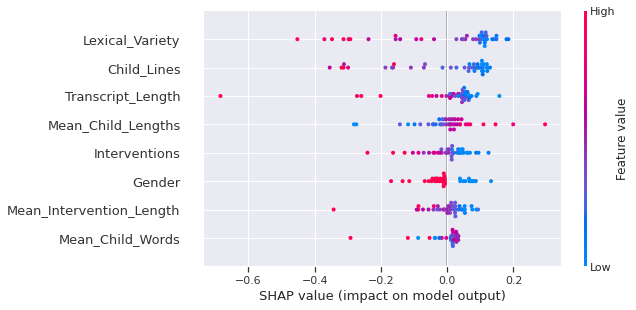

In [ ]:
shap.plots.beeswarm(shap_values, show = False)
plt.savefig('ShapBees.png', dpi = 300, bbox_inches='tight')
plt.show()

# Individual Feature Plots

In [ ]:
#Reloading the data but not scaling it
data = pd.read_csv("ADHDFeaturesMore3.csv")
data = data.drop(columns = ['Unnamed: 0', 'Dialect_Uses', 'Grammatical_Errors', 'Unfinished_Utterances', 'Filler_Uses'])
from sklearn.preprocessing import LabelBinarizer
data['Development'] = LabelBinarizer().fit_transform(data.Development)
data['Gender'] = LabelBinarizer().fit_transform(data.Gender)
data = data.drop('Intervention_Lengths', axis = 1)
data = data.drop('Child_Lengths', axis = 1)
data = data.drop('Child_words', axis = 1)
data = data.dropna()
data = data.loc[:, data.columns!='Unnamed: 0']


In [ ]:
#Stratifying data
(data['Development'].value_counts()) 


1    31
0    24
Name: Development, dtype: int64

In [ ]:
data = data.groupby('Development', group_keys=False).apply(lambda x: x.sample(24))

In [ ]:

#Segmenting into TD and ADHD
TD = data.loc[data['Development'] == 0]
ADHD = data.loc[data['Development'] == 1]

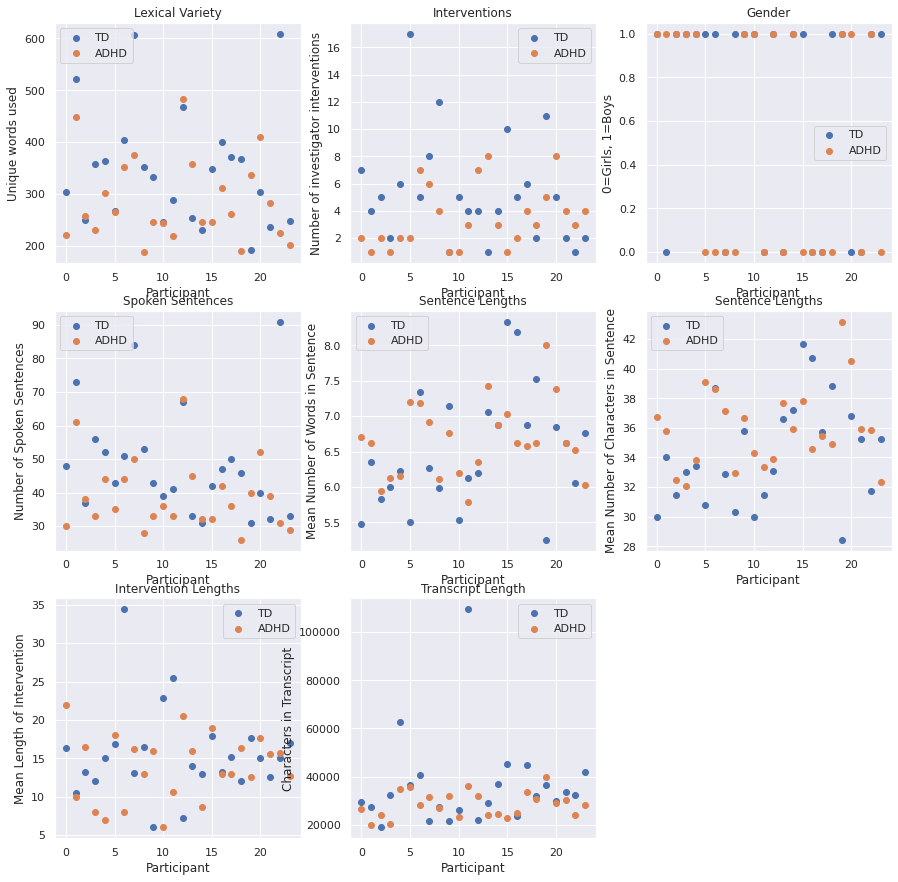

In [ ]:
plt.figure(figsize=(15,15))

plt.subplot(3,3,1)
plt.title('Lexical Variety')
plt.xlabel('Participant')
plt.ylabel('Unique words used')
plt.scatter(y = TD['Lexical_Variety'], x = np.arange(len(TD['Lexical_Variety'])), label = 'TD')
plt.scatter(y = ADHD['Lexical_Variety'],  x = np.arange(len(TD['Lexical_Variety'])), label = 'ADHD')

plt.legend()

plt.subplot(3,3,2)
plt.title('Interventions')
plt.xlabel('Participant')
plt.ylabel('Number of investigator interventions')
plt.scatter(y = TD['Interventions'], x = np.arange(len(TD['Interventions'])), label = 'TD')
plt.scatter(y = ADHD['Interventions'],  x = np.arange(len(TD['Interventions'])), label = 'ADHD')

plt.legend()

plt.subplot(3,3,3)
plt.title('Gender')
plt.xlabel('Participant')
plt.ylabel('0=Girls, 1=Boys')
plt.scatter(y = TD['Gender'], x = np.arange(len(TD['Gender'])), label = 'TD')
plt.scatter(y = ADHD['Gender'],  x = np.arange(len(TD['Gender'])), label = 'ADHD')

plt.legend()

plt.subplot(3,3,4)
plt.title('Spoken Sentences')
plt.xlabel('Participant')
plt.ylabel('Number of Spoken Sentences')
plt.scatter(y = TD['Child_Lines'], x = np.arange(len(TD['Child_Lines'])), label = 'TD')
plt.scatter(y = ADHD['Child_Lines'],  x = np.arange(len(TD['Child_Lines'])), label = 'ADHD')
plt.legend()

plt.subplot(3,3,5)
plt.title('Sentence Lengths')
plt.xlabel('Participant')
plt.ylabel('Mean Number of Words in Sentence')
plt.scatter(y = TD['Mean_Child_Words'], x = np.arange(len(TD['Mean_Child_Words'])), label = 'TD')
plt.scatter(y = ADHD['Mean_Child_Words'],  x = np.arange(len(TD['Mean_Child_Words'])), label = 'ADHD')
plt.legend()

plt.subplot(3,3,6)
plt.title('Sentence Lengths')
plt.xlabel('Participant')
plt.ylabel('Mean Number of Characters in Sentence')
plt.scatter(y = TD['Mean_Child_Lengths'], x = np.arange(len(TD['Mean_Child_Lengths'])), label = 'TD')
plt.scatter(y = ADHD['Mean_Child_Lengths'],  x = np.arange(len(TD['Mean_Child_Lengths'])), label = 'ADHD')
plt.legend()


plt.subplot(3,3,7)
plt.title('Intervention Lengths')
plt.xlabel('Participant')
plt.ylabel('Mean Length of Intervention')
plt.scatter(y = TD['Mean_Intervention_Length'], x = np.arange(len(TD['Mean_Intervention_Length'])), label = 'TD')
plt.scatter(y = ADHD['Mean_Intervention_Length'],  x = np.arange(len(TD['Mean_Intervention_Length'])), label = 'ADHD')
plt.legend()

plt.subplot(3,3,8)
plt.title('Transcript Length')
plt.xlabel('Participant')
plt.ylabel('Characters in Transcript')
plt.scatter(y = TD['Transcript_Length'], x = np.arange(len(TD['Transcript_Length'])), label = 'TD')
plt.scatter(y = ADHD['Transcript_Length'],  x = np.arange(len(TD['Transcript_Length'])), label = 'ADHD')
plt.legend()

# Draw Inference (Experimental)

In [ ]:
test = pd.read_csv('EstherFeatures.csv')
test

,Unnamed: 0,Gender,Transcript_Length,Interventions,Intervention_Lengths,Mean_Intervention_Length,Child_Lines,Child_Lengths,Mean_Child_Lengths,Child_words,Mean_Child_Words,Lexical_Variety
0,0,0,7,-2,[],NaN,7,"[85, 65, 77, 31, 84, 22, -3]",51.571429,"[16, 13, 15, 6, 19, 4, -1]",10.285714,75


In [ ]:
from sklearn.preprocessing import LabelBinarizer
#data['Development'] = LabelBinarizer().fit_transform(data.Development)
test['Gender'] = LabelBinarizer().fit_transform(test.Gender)

test = test.drop('Intervention_Lengths', axis = 1)
test = test.drop('Child_Lengths', axis = 1)
test = test.drop('Child_words', axis = 1)
#data = data.drop('Mean_Child_Words', axis = 1)
#data = data.drop('Dialect_Uses', axis = 1)
#data = data.drop('Unfinished_Utterances', axis = 1)
#data = data.drop('Filler_Uses', axis = 1)


test = test.fillna(0)
test = test.loc[:, test.columns!='Unnamed: 0']
test

,Gender,Transcript_Length,Interventions,Mean_Intervention_Length,Child_Lines,Mean_Child_Lengths,Mean_Child_Words,Lexical_Variety
0,0,7,-2,0.0,7,51.571429,10.285714,75


In [ ]:
with open('Esther.txt') as file:
  text = file.read()
  length = len(text)
print(length)

test['Transcript_Length'] = length*6
test['Child_Lines'] = test['Child_Lines']*6
test['Lexical_Variety'] = test['Lexical_Variety']*6
test['Interventions'] = 0

389


In [ ]:
test

,Gender,Transcript_Length,Interventions,Mean_Intervention_Length,Child_Lines,Mean_Child_Lengths,Mean_Child_Words,Lexical_Variety
0,0,2334,0,0.0,42,51.571429,10.285714,450


0    42
Name: Child_Lines, dtype: int64


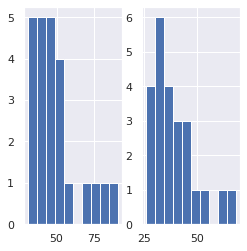

In [ ]:
plt.subplot(1,3,1)
plt.hist(TD['Child_Lines'])

plt.subplot(1,3,2)
plt.hist(ADHD['Child_Lines'])

print(test['Child_Lines'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler().fit(test)

test = scaler.transform(test)
test

array([[   0.        , 2334.        ,    0.        ,    0.        ,
          42.        ,   51.57142857,   10.28571429,  450.        ]])

In [ ]:
print(model.predict_proba(test))

[[0.75 0.25]]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
